# Welcome to reddit-spectra! - Vigaash & Salik

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS, TfidfTransformer
from sklearn.manifold import MDS
from wordcloud import WordCloud
from sklearn.manifold import TSNE

In [2]:
df = pd.read_csv('text_comments.csv')
df.head

/var/folders/95/n2pn5_2s6hs50t59pkmwqp9c0000gn/T/ipykernel_14930/2918962590.py:1: DtypeWarning: Columns (2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('text_comments.csv')


<bound method NDFrame.head of                   id  score    link_id                author  \
0         t1_ftjl56l    4.0  t3_gzv6so             mega_trex   
1         t1_ftjpxmc    6.0  t3_gzv6so             [deleted]   
2         t1_gzzxfyt   22.0  t3_nodb9e             divadream   
3         t1_gzzy7nc   92.0  t3_no6qaj  Ziegenkoennenfliegen   
4         t1_h00tpbp   82.0  t3_nolx7p       meowrottenralph   
...              ...    ...        ...                   ...   
46413720  t1_ew3s0p8    1.0  t3_cmccmo                  AJTK   
46413721  t1_ennpzrt    1.0  t3_bp2f3w          imdelirious3   
46413722  t1_f02psre    5.0  t3_d3f1tn      NocapNightingale   
46413723  t1_f5t4bhw    1.0  t3_dp6jz9              jag-engr   
46413724  t1_errythg    1.0  t3_c3ad9x             Mercbeast   

                  subreddit  \
0         BeautyGuruChatter   
1         BeautyGuruChatter   
2         BeautyGuruChatter   
3         BeautyGuruChatter   
4         BeautyGuruChatter   
...            

#### Initial cleaning. We are only concerned with four main columns, the subreddit, score, the text body and the date. We removed the rest of the columns to ensure anonymity of the users and reduce unneeded information.

In [3]:
df2 = df[['subreddit', 'score', 'body', 'created_utc']]
df2

,subreddit,score,body,created_utc
0,BeautyGuruChatter,4.0,Does anyone have a good cruelty free one? The ...,1.591756e+09
1,BeautyGuruChatter,6.0,(stares at my soft glam i've had for like 3 ye...,1.591758e+09
2,BeautyGuruChatter,22.0,When Jen’s initial reactions came out to the s...,1.622398e+09
3,BeautyGuruChatter,92.0,I think you mean a \n>Highschool *fucking* bully,1.622399e+09
4,BeautyGuruChatter,82.0,Ugh. I was honestly hoping that this brand wou...,1.622415e+09
...,...,...,...,...
46413720,SquaredCircle,1.0,"Did people forget Finn had to face Corbin, Jin...",1.565093e+09
46413721,AskReddit,1.0,I hope,1.557950e+09
46413722,TheStrokes,5.0,I will literally cry if you're right dude xD L...,1.568336e+09
46413723,ChoosingBeggars,1.0,Wow. That's incredibly hostile for no reason.,1.572450e+09


#### We will now check, which of the most polarized subreddits we have data for.

In [4]:
df_leftwing = df2[df2['subreddit'].isin(['democrats', 'EnoughLibertarianSpam', 'hillaryclinton', 'progressive', 'BlueMidterm2018', 'EnoughHillHate', 'Enough_Sanders_Spam', 'badwomensanatomy'])]

In [5]:
print("Number of entries from r/democrats: ", df_leftwing[df_leftwing['subreddit'] == 'democrats'].shape[0])
print("Number of entries from r/EnoughLibertarianSpam: ", df_leftwing[df_leftwing['subreddit'] == 'EnoughLibertarianSpam'].shape[0])
print("Number of entries from r/hillaryclinton: ", df_leftwing[df_leftwing['subreddit'] == 'hillaryclinton'].shape[0])
print("Number of entries from r/progressive: ", df_leftwing[df_leftwing['subreddit'] == 'progressive'].shape[0])
print("Number of entries from r/BlueMidterm2018: ", df_leftwing[df_leftwing['subreddit'] == 'BlueMidterm2018'].shape[0])
print("Number of entries from r/EnoughHillHate: ", df_leftwing[df_leftwing['subreddit'] == 'EnoughHillHate'].shape[0])
print("Number of entries from r/Enough_Sanders_Spam: ", df_leftwing[df_leftwing['subreddit'] == 'Enough_Sanders_Spam'].shape[0])
print("Number of entries from r/badwomensanatomy: ", df_leftwing[df_leftwing['subreddit'] == 'badwomensanatomy'].shape[0])

Number of entries from r/democrats:  4446
Number of entries from r/EnoughLibertarianSpam:  1462
Number of entries from r/hillaryclinton:  0
Number of entries from r/progressive:  0
Number of entries from r/BlueMidterm2018:  0
Number of entries from r/EnoughHillHate:  0
Number of entries from r/Enough_Sanders_Spam:  16831
Number of entries from r/badwomensanatomy:  12163


In [6]:
df_rightwing = df2[df2['subreddit'].isin(['Conservative', 'The_Donald', 'TrueChristian', 'NoFapChristians', 'Mr_Trump', 'metacanada', 'conservatives', 'new_right'])]

In [7]:
print("Number of entries from r/Conservative: ", df_rightwing[df_rightwing['subreddit'] == 'Conservative'].shape[0])
print("Number of entries from r/The_Donald: ", df_rightwing[df_rightwing['subreddit'] == 'The_Donald'].shape[0])
print("Number of entries from r/TrueChristian: ", df_rightwing[df_rightwing['subreddit'] == 'TrueChristian'].shape[0])
print("Number of entries from r/NoFapChristians: ", df_rightwing[df_rightwing['subreddit'] == 'NoFapChristians'].shape[0])
print("Number of entries from r/Mr_Trump: ", df_rightwing[df_rightwing['subreddit'] == 'Mr_Trump'].shape[0])
print("Number of entries from r/metacanada: ", df_rightwing[df_rightwing['subreddit'] == 'metacanada'].shape[0])
print("Number of entries from r/conservatives: ", df_rightwing[df_rightwing['subreddit'] == 'conservatives'].shape[0])
print("Number of entries from r/new_right: ", df_rightwing[df_rightwing['subreddit'] == 'new_right'].shape[0])

Number of entries from r/Conservative:  76876
Number of entries from r/The_Donald:  0
Number of entries from r/TrueChristian:  6558
Number of entries from r/NoFapChristians:  0
Number of entries from r/Mr_Trump:  0
Number of entries from r/metacanada:  6195
Number of entries from r/conservatives:  3572
Number of entries from r/new_right:  0


#### From the analysis above we only have data from four subreddits from the left and right wing, we will choose these four from each to do our LDA analysis.

In [8]:
df_leftwing = df2[df2['subreddit'].isin(['democrats', 'EnoughLibertarianSpam', 'Enough_Sanders_Spam', 'badwomensanatomy'])]
df_rightwing = df2[df2['subreddit'].isin(['Conservative', 'TrueChristian', 'metacanada', 'conservatives'])]

#### We will now do some additional data cleaning by removing duplicate entries and removing any text bodies with '[removed]'/'[deleted]' as our data set includes removed and deleted comments.

In [24]:
df_rightwing = df_rightwing.drop_duplicates()
df_leftwing = df_leftwing.drop_duplicates()

df_rightwing = df_rightwing[df.body != '[removed]']
df_leftwing = df_leftwing[df.body != '[removed]']

df_rightwing = df_rightwing[df.body != '[deleted]']
df_leftwing = df_leftwing[df.body != '[deleted]']

/var/folders/95/n2pn5_2s6hs50t59pkmwqp9c0000gn/T/ipykernel_14930/3409734139.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_rightwing = df_rightwing[df.body != '[removed]']
/var/folders/95/n2pn5_2s6hs50t59pkmwqp9c0000gn/T/ipykernel_14930/3409734139.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_leftwing = df_leftwing[df.body != '[removed]']
/var/folders/95/n2pn5_2s6hs50t59pkmwqp9c0000gn/T/ipykernel_14930/3409734139.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_rightwing = df_rightwing[df.body != '[deleted]']
/var/folders/95/n2pn5_2s6hs50t59pkmwqp9c0000gn/T/ipykernel_14930/3409734139.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_leftwing = df_leftwing[df.body != '[deleted]']


In [25]:
df_rightwing

,subreddit,score,body,created_utc
4335884,conservatives,1.0,Federal lawmakers don't make a habit of going ...,1.606253e+09
4335885,conservatives,-1.0,"Let’s face it, every politician has something ...",1.606268e+09
4335886,conservatives,1.0,Are you that locked in a DNC bubble. Many sta...,1.609793e+09
4335887,conservatives,-20.0,I think it's probably warranted. Better safe t...,1.609802e+09
4335889,conservatives,1.0,"1. It's 30,000.\n\n2. This proves the point. H...",1.606283e+09
...,...,...,...,...
46407933,TrueChristian,10.0,"Heh. ""Bound to it"".",1.554425e+09
46408517,metacanada,3.0,"No man, you've been brainwashed by leftist med...",1.549636e+09
46409701,TrueChristian,3.0,"Yes thank for you for clarification, you can t...",1.575603e+09
46410807,Conservative,14.0,This political correctness racket is starting ...,1.574919e+09


In [26]:
df_leftwing

,subreddit,score,body,created_utc
4058133,EnoughLibertarianSpam,10.0,**[Swill milk scandal](https://en.wikipedia.or...,1.607839e+09
4058134,EnoughLibertarianSpam,1.0,"Idk about the tax code stuff, I mean plenty of...",1.607881e+09
4058135,EnoughLibertarianSpam,17.0,"Particularly vile, because of the philosophica...",1.607889e+09
4058136,EnoughLibertarianSpam,4.0,"No, tell me, who’s freedom do you value?",1.596058e+09
4058137,EnoughLibertarianSpam,217.0,"for some reason, the way he licks his fingers ...",1.607900e+09
...,...,...,...,...
46392932,Enough_Sanders_Spam,4.0,Does it smell as nice as it looks?,1.575048e+09
46395096,badwomensanatomy,1.0,No,1.558772e+09
46398231,Enough_Sanders_Spam,9.0,I don't spend much time there...how so?,1.569704e+09
46400313,EnoughLibertarianSpam,14.0,Anyone remember the name of that neighbor who ...,1.563605e+09


#### We will define our stop words. In addition to using the standard english stop words provided by sklearn, we will add some additional stop words. These words are common internet abbreviations, curse words and words which we found to be execessively used in these subreddits but provide no value.

In [27]:
additional_stop_words = ['lol', 'omg', 'btw', 'brb', 'gtg', 'imho', 'fyi', 'idk', 'smh', 'ttyl', 'tldr', 'www', 'lmao', 'yes', 'no', 'like', 'just', 'did', 'yeah', 'oh', 'https', 'sure', 'good', 'bad', 'ok', 'okay', 'com', 'fuck', 'fucking', '']
stop_words = list(ENGLISH_STOP_WORDS.union(additional_stop_words))

#### Now we will initialize our Vectorizer. We are only concerned with 1-grams (single words).

In [28]:
right_vectorizer = CountVectorizer(max_features=500, ngram_range=(1,1), stop_words=stop_words)
rightwing_vectorizer = right_vectorizer.fit_transform(df_rightwing['body'].values.astype('U'))

left_vectorizer = CountVectorizer(max_features=500, ngram_range=(1,1), stop_words=stop_words)
leftwing_vectorizer = left_vectorizer.fit_transform(df_leftwing['body'].values.astype('U'))

#### Using our vectorizer, we will perform some initial data analysis by creating a word cloud, this will help us see what the most commonly used words are.

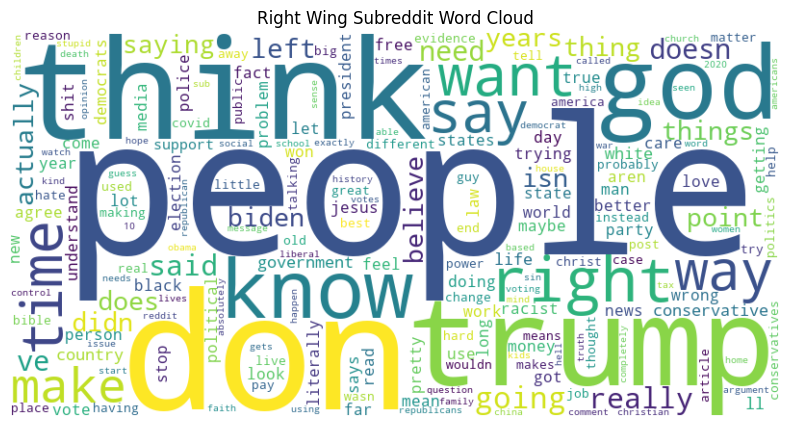

In [29]:
feature_names = right_vectorizer.get_feature_names_out()
word_freq = dict(zip(feature_names, rightwing_vectorizer.sum(axis=0).A1))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Right Wing Subreddit Word Cloud')
plt.show()

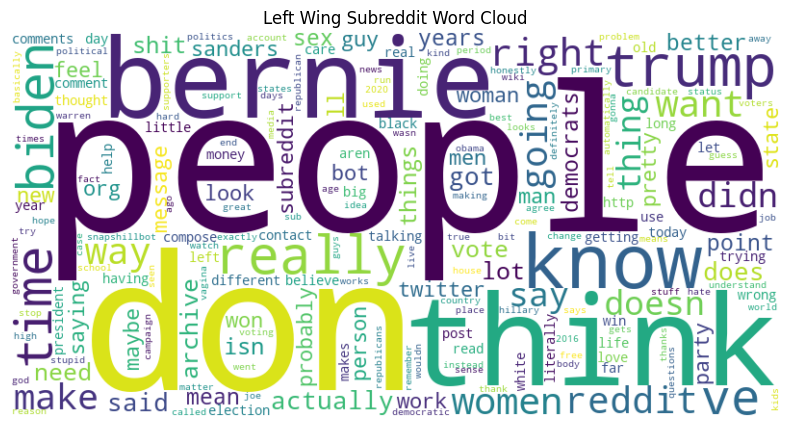

In [30]:
feature_names = left_vectorizer.get_feature_names_out()
word_freq = dict(zip(feature_names, leftwing_vectorizer.sum(axis=0).A1))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Left Wing Subreddit Word Cloud')
plt.show()

#### Now we will apply the TFIDF Transformer. We do this because it reflects the importance of a term in a document relative to a collection of documents. We aren't purely concerned with just the count of each term.

In [31]:
right_transformer = TfidfTransformer(smooth_idf=False)
rightwing_tfidf = right_transformer.fit_transform(rightwing_vectorizer).toarray()

left_transformer = TfidfTransformer(smooth_idf=False)
leftwing_tfidf = left_transformer.fit_transform(leftwing_vectorizer).toarray()

#### Lets now apply LDA, and look at the terms that are associated with each topic. We restrict LDA to 4 topics as we took data from four initial subreddits.

In [32]:
right_lda = LatentDirichletAllocation(n_components=4)
right_topic_document_matrix = right_lda.fit_transform(rightwing_tfidf)
right_lda_weights = pd.DataFrame(right_lda.components_, columns=right_vectorizer.get_feature_names_out())
right_lda_weights = right_lda_weights.melt(ignore_index=False).reset_index().groupby('index').apply(lambda x: x.sort_values('value', ascending=False).iloc[0:5])
right_lda_weights

index variable        value
index                                  
0     724       0      god   889.995784
      1732      0    think   575.452727
      548       0      don   495.990498
      1272      0   people   472.378015
      1020      0     life   411.023966
1     1273      1   people  1010.266347
      549       1      don   883.659804
      1497      1      say   468.321131
      745       1      got   452.596690
      1881      1     want   447.974588
2     1914      2    white   635.952727
      1550      2     shit   627.560300
      190       2    black   514.615189
      1274      2   people   458.463755
      770       2      guy   457.537197
3     1783      3    trump  1235.563804
      179       3    biden   801.007035
      1471      3    right   709.793323
      987       3     left   676.831387
      1855      3     vote   583.842273

In [33]:
left_lda = LatentDirichletAllocation(n_components=4)
left_topic_document_matrix = left_lda.fit_transform(leftwing_tfidf)
left_lda_weights = pd.DataFrame(left_lda.components_, columns=left_vectorizer.get_feature_names_out())
left_lda_weights = left_lda_weights.melt(ignore_index=False).reset_index().groupby('index').apply(lambda x: x.sort_values('value', ascending=False).iloc[0:5])
left_lda_weights

index variable       value
index                                 
0     1424      0   reddit  223.097962
      1032      0    makes  192.856657
      1636      0      sub  161.926307
      1320      0     post  161.558780
      100       0  archive  158.756810
1     157       1   bernie  555.054962
      1769      1    trump  505.019319
      169       1    biden  424.734585
      469       1      don  282.393994
      1825      1     vote  277.036770
2     1818      2       ve  382.363919
      1230      2   people  357.267366
      1410      2   really  291.360097
      1734      2     time  264.190960
      470       2      don  245.945492
3     1927      3    women  390.377862
      1787      3  twitter  295.405985
      1059      3     mean  254.815221
      1719      3    think  249.570262
      1047      3      man  231.250051

#### Although the above is nice, lets see visually the topics of each comment. We will use t-SNE to plot all of the comments on a 2D plane.

python(16214) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


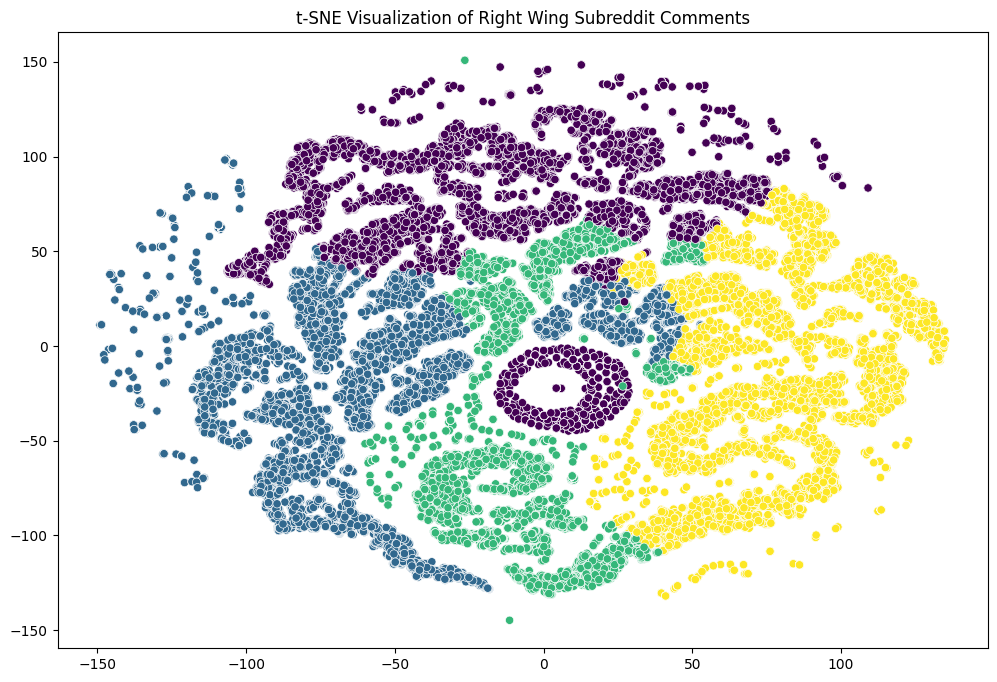

In [34]:
tsne = TSNE(n_components=2, random_state=42)
documents_2d = tsne.fit_transform(right_topic_document_matrix)
dominant_topic = right_topic_document_matrix.argmax(axis=1)

plt.figure(figsize=(12, 8))
sns.scatterplot(x=documents_2d[:, 0], y=documents_2d[:, 1], hue=dominant_topic, palette='viridis', legend=None)
plt.title('t-SNE Visualization of Right Wing Subreddit Comments')
plt.show()

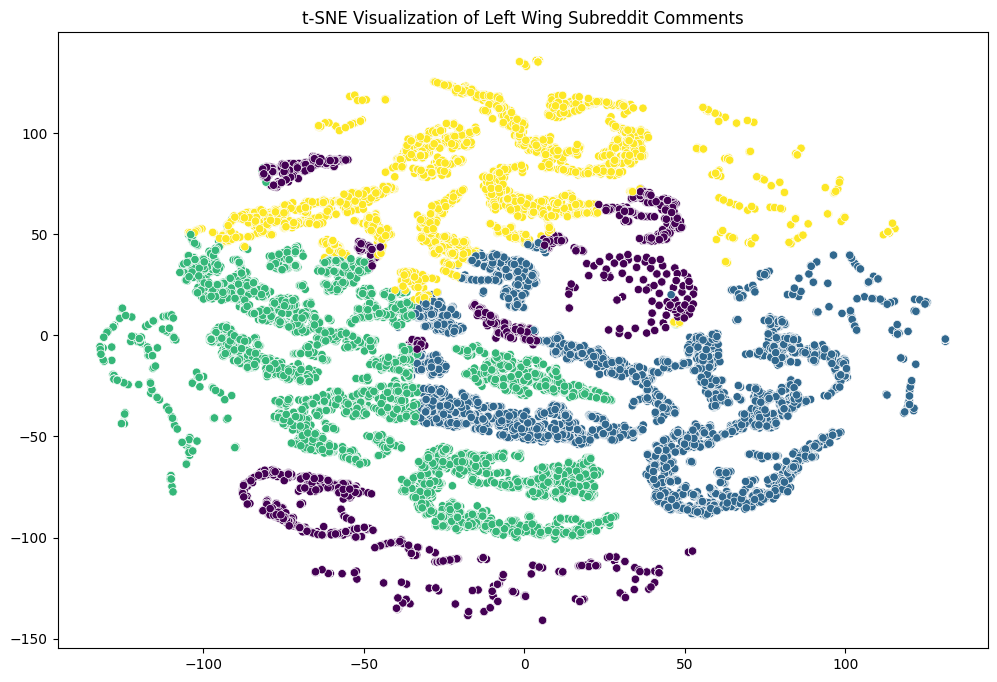

In [35]:
tsne = TSNE(n_components=2, random_state=42)
documents_2d = tsne.fit_transform(left_topic_document_matrix)
dominant_topic = left_topic_document_matrix.argmax(axis=1)

plt.figure(figsize=(12, 8))
sns.scatterplot(x=documents_2d[:, 0], y=documents_2d[:, 1], hue=dominant_topic, palette='viridis', legend=None)
plt.title('t-SNE Visualization of Left Wing Subreddit Comments')
plt.show()